In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import os
import math

Response: imdb_score

In [2]:
movies = pd.read_csv('movie_metadata.csv')
list(movies.columns)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

# IMDB SCORE
#### If score is above 75% quartile movie is good (1), else bad (0)

In [3]:
good_score = movies['imdb_score'].quantile(0.75)
movies['good_movie'] = movies['imdb_score'].apply(lambda x: 1 if x >= good_score else 0)

In [4]:
movies.corrwith(movies.good_movie).sort_values(ascending = False)

good_movie                   1.000000
imdb_score                   0.681022
num_voted_users              0.364947
num_user_for_reviews         0.272405
movie_facebook_likes         0.232860
num_critic_for_reviews       0.221334
duration                     0.200878
gross                        0.165646
director_facebook_likes      0.163755
aspect_ratio                 0.066005
actor_2_facebook_likes       0.043753
cast_total_facebook_likes    0.042055
actor_1_facebook_likes       0.038629
actor_3_facebook_likes       0.027265
budget                       0.000898
facenumber_in_poster        -0.066470
title_year                  -0.197580
dtype: float64

In [5]:
missing_values_sum = movies.isna().sum()
print(missing_values_sum)

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
good_movie                     0
dtype: int64


# EDA

### GENRE

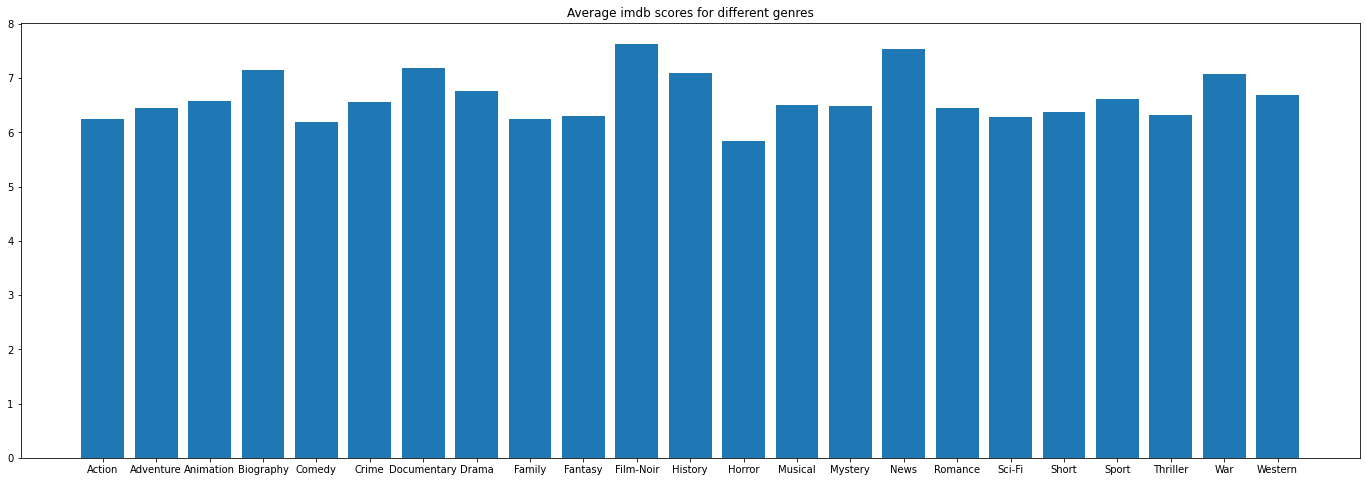

In [6]:
genres_df = movies.loc[:, ["genres", "imdb_score"]].copy()

genres_df["Action"] = [1 if "Action" in genre else 0 for genre in genres_df["genres"]]
genres_df["Adventure"] = [1 if "Adventure" in genre else 0 for genre in genres_df["genres"]]
genres_df["Animation"] = [1 if "Animation" in genre else 0 for genre in genres_df["genres"]]
genres_df["Biography"] = [1 if "Biography" in genre else 0 for genre in genres_df["genres"]]
genres_df["Comedy"] = [1 if "Comedy" in genre else 0 for genre in genres_df["genres"]]
genres_df["Crime"] = [1 if "Crime" in genre else 0 for genre in genres_df["genres"]]
genres_df["Documentary"] = [1 if "Documentary" in genre else 0 for genre in genres_df["genres"]]
genres_df["Drama"] = [1 if "Drama" in genre else 0 for genre in genres_df["genres"]]
genres_df["Family"] = [1 if "Family" in genre else 0 for genre in genres_df["genres"]]
genres_df["Fantasy"] = [1 if "Fantasy" in genre else 0 for genre in genres_df["genres"]]
genres_df["Film-Noir"] = [1 if "Film-Noir" in genre else 0 for genre in genres_df["genres"]]
genres_df["History"] = [1 if "History" in genre else 0 for genre in genres_df["genres"]]
genres_df["Horror"] = [1 if "Horror" in genre else 0 for genre in genres_df["genres"]]
genres_df["Musical"] = [1 if "Musical" in genre else 0 for genre in genres_df["genres"]]
genres_df["Mystery"] = [1 if "Mystery" in genre else 0 for genre in genres_df["genres"]]
genres_df["News"] = [1 if "News" in genre else 0 for genre in genres_df["genres"]]
genres_df["Romance"] = [1 if "Romance" in genre else 0 for genre in genres_df["genres"]]
genres_df["Sci-Fi"] = [1 if "Sci-Fi" in genre else 0 for genre in genres_df["genres"]]
genres_df["Short"] = [1 if "Short" in genre else 0 for genre in genres_df["genres"]]
genres_df["Sport"] = [1 if "Sport" in genre else 0 for genre in genres_df["genres"]]
genres_df["Thriller"] = [1 if "Thriller" in genre else 0 for genre in genres_df["genres"]]
genres_df["War"] = [1 if "War" in genre else 0 for genre in genres_df["genres"]]
genres_df["Western"] = [1 if "Western" in genre else 0 for genre in genres_df["genres"]]


means = []
for column in genres_df.columns[2:]:
    means.append(genres_df.loc[genres_df[column] == 1, "imdb_score"].mean())

    
fig, ax = plt.subplots(figsize=(24, 8))
plt.bar(x=genres_df.columns[2:], height=means)
plt.title("Average imdb scores for different genres")
plt.show()

### Country

In [7]:
movies['country'] = pd.Categorical(movies['country'])

movies['country'] = movies['country'].cat.add_categories('Others')

movies.loc[~movies['country'].isin(['USA', 'UK']), 'country'] = 'Others'

movies['country'] = pd.Categorical(movies['country'])

In [8]:
# Create dummy variables for the 'country' column
dummies = pd.get_dummies(movies['country'], prefix = 'country')

# Add the dummy variables to the original DataFrame
movies = pd.concat([movies, dummies], axis=1)

# Drop the original 'country' column
movies.drop('country', axis=1, inplace=True)

### Facebook likes

In [9]:
#combining all actor facebook likes
movies['actors_facebook_likes'] = movies['actor_1_facebook_likes'] + movies['actor_2_facebook_likes'] + movies['actor_3_facebook_likes']

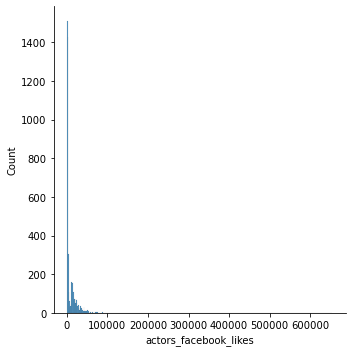

In [10]:
sns.displot(movies, x="actors_facebook_likes")

In [11]:
# If the actors have facebook likes greater than 75% of the others, they are famous (1) else not (0)
famous = movies['actors_facebook_likes'].quantile(0.7)
movies['actors_facebook_likes'] = movies['actors_facebook_likes'].apply(lambda x: 1 if x > famous else 0)

### Budget

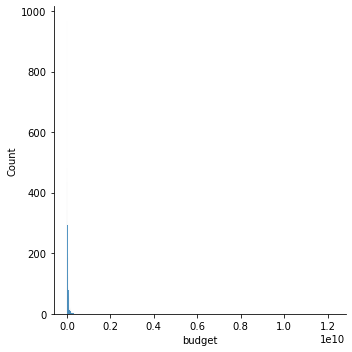

In [12]:
sns.displot(movies, x="budget")

In [13]:
print('MAX:', movies['budget'].max(), ', MIN:', movies['budget'].min(), ', AVG:', movies['budget'].mean())

MAX: 12215500000.0 , MIN: 218.0 , AVG: 39752620.436387606


In [14]:
# if budget > average, expensive (1), else cheap (0)
movies['budget'] = movies['budget'].apply(lambda x: 1 if x > movies['budget'].mean() else 0)

## Check correlation

In [12]:
movies.corrwith(movies.good_movie).sort_values(ascending = False)

good_movie                      1.000000
imdb_score                      0.681022
num_voted_users                 0.364947
num_user_for_reviews            0.272405
movie_facebook_likes            0.232860
                                  ...   
country_Taiwan                       NaN
country_Thailand                     NaN
country_Turkey                       NaN
country_United Arab Emirates         NaN
country_West Germany                 NaN
Length: 84, dtype: float64

# CREATING THE MODEL

In [13]:
logit_model = sm.logit(formula= 'good_movie ~ duration + title_year + director_facebook_likes * actors_facebook_likes + country_UK + country_USA + country_Others + budget', data = movies).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.513657
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             good_movie   No. Observations:                 4538
Model:                          Logit   Df Residuals:                     4529
Method:                           MLE   Df Model:                            8
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.1166
Time:                        21:28:51   Log-Likelihood:                -2331.0
converged:                       True   LL-Null:                       -2638.6
Covariance Type:            nonrobust   LLR p-value:                1.261e-127
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                             

In [14]:
def confusion_matrix_train(model,cutoff=0.46):
    # Confusion matrix
    cm_df = pd.DataFrame(model.pred_table(threshold = cutoff))
    #Formatting the confusion matrix
    cm_df.columns = ['Predicted 0', 'Predicted 1'] 
    cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(cm_df)
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))

Classification accuracy = 76.6%
Precision = 64.0%
TPR or Recall = 29.3%
FNR = 70.7%
FPR = 6.0%


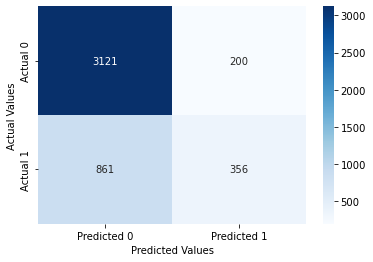

In [15]:
confusion_matrix_train(logit_model)

# Gab work

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.metrics import roc_curve, auc

In [17]:
def confusion_matrix_data(data, actual_values, model, cutoff = 0.5):
# Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins = np.array([0,cutoff,1])
# Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index = {0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))
    return cm_df

In [18]:
# Did not dummy budget for this one, wanted to try out a transformation instead
movies2 = movies.dropna()
movies2.budget

0       237000000.0
1       300000000.0
2       245000000.0
3       250000000.0
5       263700000.0
           ...     
5026         4500.0
5027        10000.0
5033         7000.0
5035         7000.0
5042         1100.0
Name: budget, Length: 3756, dtype: float64

In [89]:
logit_modelg = sm.logit(formula= 'good_movie ~ duration + director_facebook_likes * actors_facebook_likes + budget + np.log(budget)', data = movies2).fit()
logit_modelg.summary()

Optimization terminated successfully.
         Current function value: 0.506078
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             good_movie   No. Observations:                 3756
Model:                          Logit   Df Residuals:                     3749
Method:                           MLE   Df Model:                            6
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.1291
Time:                        21:53:22   Log-Likelihood:                -1900.8
converged:                       True   LL-Null:                       -2182.6
Covariance Type:            nonrobust   LLR p-value:                1.699e-118
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         0.9755      0.462      2.113      0.035       0.071       1.880
duration                                          0.0379      0.002     16.999      0.000       0.034       0.042
director_facebook_likes                           0.0001   2.45e-05      5.274      0.000    8.13e-05       0.000
actors_facebook_likes                             0.4458      0.090      4.930      0.000       0.269       0.623
director_facebook_likes:actors_facebook_likes -5.757e-05   2.85e-05     -2.018      0.044      -0.000   -1.66e-06
budget                                         3.208e-10   1.58e-10      2.031      0.042    1.12e-11     6.3e-10
np.log(budget)                                   -0.3895      0.031    -12.761      0.000      -0.449      -0.330
=================================================================================================================
"""

Classification accuracy = 76.9%
Precision = 65.7%
TPR or Recall = 28.4%
FNR = 71.6%
FPR = 5.4%
ROC-AUC = 75.2%


,Predicted 0,Predicted 1
Actual 0,2601.0,149.0
Actual 1,720.0,286.0


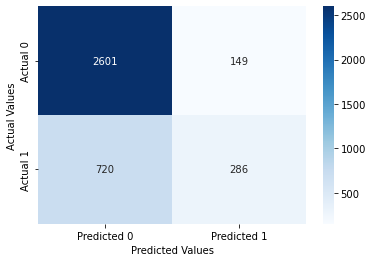

In [90]:
confusion_matrix_data(movies2, movies2.good_movie, logit_modelg, cutoff = 0.46)

In [91]:
from sklearn.metrics import precision_recall_curve, auc

y = movies2.good_movie
y_pred = logit_modelg.predict(movies2)

precision, recall, thresholds = precision_recall_curve(y, y_pred)
pr_auc = auc(recall, precision)

max_precision_index = np.argmax(precision[:-1])
decision_threshold = thresholds[max_precision_index]


In [92]:
decision_threshold

0.7705685870216994

Classification accuracy = 74.9%
Precision = 81.4%
TPR or Recall = 8.3%
FNR = 91.7%
FPR = 0.7%
ROC-AUC = 75.2%


,Predicted 0,Predicted 1
Actual 0,2731.0,19.0
Actual 1,923.0,83.0


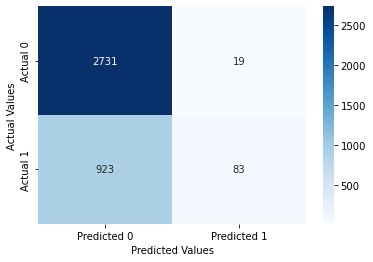

In [93]:
confusion_matrix_data(movies2, movies2.good_movie, logit_modelg, cutoff = decision_threshold)